epoch=  1,train_loss=654.3063,valid_loss=436.0928
epoch=  2,train_loss=578.4484,valid_loss=371.5451
epoch=  3,train_loss=512.7658,valid_loss=317.6119
epoch=  4,train_loss=455.8879,valid_loss=272.7183
epoch=  5,train_loss=406.6285,valid_loss=235.5123
epoch=  6,train_loss=363.9620,valid_loss=204.8343
epoch=  7,train_loss=327.0008,valid_loss=179.6900
epoch=  8,train_loss=294.9774,valid_loss=159.2279
epoch=  9,train_loss=267.2274,valid_loss=142.7187
epoch= 10,train_loss=243.1762,valid_loss=129.5389
epoch= 11,train_loss=222.3268,valid_loss=119.1558
epoch= 12,train_loss=204.2491,valid_loss=111.1145
epoch= 13,train_loss=188.5708,valid_loss=105.0275
epoch= 14,train_loss=174.9700,valid_loss=100.5645
epoch= 15,train_loss=163.1680,valid_loss=97.4448
epoch= 16,train_loss=152.9238,valid_loss=95.4302
epoch= 17,train_loss=144.0287,valid_loss=94.3186
epoch= 18,train_loss=136.3022,valid_loss=93.9391
epoch= 19,train_loss=129.5879,valid_loss=94.1477
epoch= 20,train_loss=123.7508,valid_loss=94.8228
epoch=

epoch=170,train_loss=82.3426,valid_loss=122.2280
epoch=171,train_loss=82.3650,valid_loss=122.1351
epoch=172,train_loss=82.3876,valid_loss=122.0432
epoch=173,train_loss=82.4104,valid_loss=121.9519
epoch=174,train_loss=82.4334,valid_loss=121.8616
epoch=175,train_loss=82.4566,valid_loss=121.7720
epoch=176,train_loss=82.4800,valid_loss=121.6833
epoch=177,train_loss=82.5036,valid_loss=121.5953
epoch=178,train_loss=82.5273,valid_loss=121.5081
epoch=179,train_loss=82.5513,valid_loss=121.4217
epoch=180,train_loss=82.5754,valid_loss=121.3361
epoch=181,train_loss=82.5996,valid_loss=121.2513
epoch=182,train_loss=82.6241,valid_loss=121.1672
epoch=183,train_loss=82.6487,valid_loss=121.0837
epoch=184,train_loss=82.6734,valid_loss=121.0011
epoch=185,train_loss=82.6983,valid_loss=120.9192
epoch=186,train_loss=82.7234,valid_loss=120.8380
epoch=187,train_loss=82.7486,valid_loss=120.7575
epoch=188,train_loss=82.7739,valid_loss=120.6777
epoch=189,train_loss=82.7994,valid_loss=120.5987
epoch=190,train_loss

epoch=339,train_loss=87.1039,valid_loss=113.7592
epoch=340,train_loss=87.1314,valid_loss=113.7339
epoch=341,train_loss=87.1589,valid_loss=113.7086
epoch=342,train_loss=87.1863,valid_loss=113.6836
epoch=343,train_loss=87.2137,valid_loss=113.6587
epoch=344,train_loss=87.2410,valid_loss=113.6339
epoch=345,train_loss=87.2684,valid_loss=113.6093
epoch=346,train_loss=87.2956,valid_loss=113.5848
epoch=347,train_loss=87.3228,valid_loss=113.5605
epoch=348,train_loss=87.3500,valid_loss=113.5364
epoch=349,train_loss=87.3771,valid_loss=113.5123
epoch=350,train_loss=87.4042,valid_loss=113.4884
epoch=351,train_loss=87.4312,valid_loss=113.4647
epoch=352,train_loss=87.4582,valid_loss=113.4411
epoch=353,train_loss=87.4851,valid_loss=113.4176
epoch=354,train_loss=87.5120,valid_loss=113.3943
epoch=355,train_loss=87.5388,valid_loss=113.3711
epoch=356,train_loss=87.5656,valid_loss=113.3480
epoch=357,train_loss=87.5923,valid_loss=113.3250
epoch=358,train_loss=87.6190,valid_loss=113.3023
epoch=359,train_loss

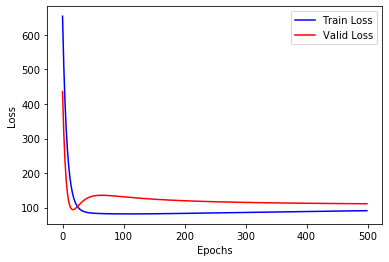

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

#导入数据
df=pd.read_csv("data/boston.csv",header=0)
ds=df.values

x_data=ds[:,:12]
y_data=ds[:,12]

#对特征值做（0-1）归一化
for i in range(12):
    x_data[:,i]=(x_data[:,i]-x_data[:,i].min())/(x_data[:,i].max()-x_data[:,i].min())



#划分数据集：训练集、验证集和测试集
train_num=300  #训练集
valid_num=100  #验证集
test_num=len(x_data)-train_num-valid_num  #测试集

#训练集划分
x_train=x_data[:train_num]
y_train=y_data[:train_num]

#验证集划分
x_valid=x_data[train_num:train_num+valid_num]
y_valid=y_data[train_num:train_num+valid_num]

#测试集划分
x_test=x_data[train_num+valid_num:train_num+valid_num+test_num]
y_test=y_data[train_num+valid_num:train_num+valid_num+test_num]

#数据转换
x_train=tf.cast(x_train,dtype=tf.float32)
#数据归一化另一种方案：x_train=tf.cast(scale(x_train),dtype=tf.float32)
x_valid=tf.cast(x_valid,dtype=tf.float32)
x_test=tf.cast(x_test,dtype=tf.float32)

#构建模型
#定义模型
def model(x,w,b):
    return tf.matmul(x,w)+b
W=tf.Variable(tf.random.normal([12,1],mean=0.0,stddev=1.0,dtype=tf.float32))
B=tf.Variable(tf.zeros(1),dtype=tf.float32)

#训练模型
#设置训练参数
training_epochs=500  #迭代次数
learning_rate=0.0005 #学习率
batch_size=10       #批量训练一次的样本数

#定义均方差损失函数
def loss(x,y,w,b):
    err=model(x,w,b)-y  #计算模型预测值和标签值的差异
    squared_err=tf.square(err)  #求平方，得出方差
    return tf.reduce_mean(squared_err) #求均值，得出均方差
#计算样本数据【x,y】在参数【w,b】点上的梯度
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_=loss(x,y,w,b)
    return tape.gradient(loss_,[w,b]) #返回梯度向量
#创建优化器
optimizer=tf.keras.optimizers.SGD(learning_rate)

#迭代训练
loss_list_train=[] #用于保存训练集loss值的列表
loss_list_valid=[] #用于保存验证集loss值的列表
total_step=int(train_num/batch_size)

for epoch in range(training_epochs):
    for step in range(total_step):
        xs=x_train[step*batch_size:(step+1)*batch_size,:]
        ys=y_train[step*batch_size:(step+1)*batch_size]
        
        grads=grad(xs,ys,W,B) #计算梯度
        optimizer.apply_gradients(zip(grads,[W,B])) #优化器根据梯度自动调整变量w和b
    loss_train=loss(x_train,y_train,W,B).numpy()
    loss_valid=loss(x_valid,y_valid,W,B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print("epoch={:3d},train_loss={:.4f},valid_loss={:.4f}".format(epoch+1,loss_train,loss_valid))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1)